In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'../data/frozen dessert production dataset.csv', index_col='DATE', parse_dates=True)

In [3]:
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [4]:
df.columns = ['Production']

In [5]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


<Axes: xlabel='DATE'>

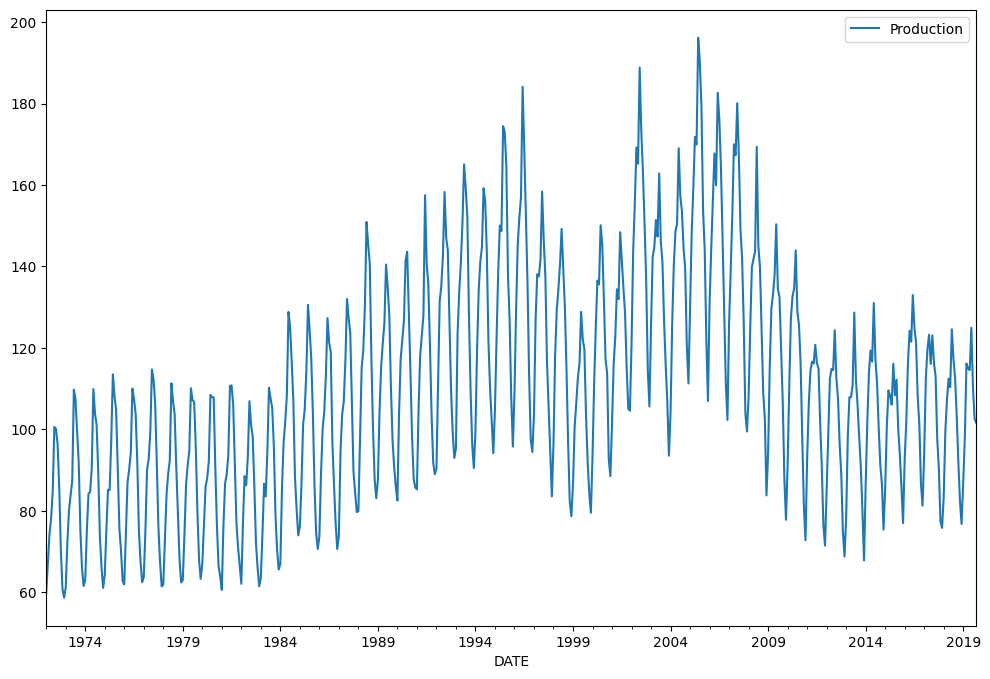

In [6]:
df.plot(figsize=(12,8))

In [7]:
len(df)

573

In [8]:
test_size = 18
test_ind = len(df) - test_size

In [9]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [10]:
len(test)

18

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
scaler.fit(train)

,feature_range,"(0, ...)"
,copy,True
,clip,False


In [14]:
scaled_train = scaler.transform(train)

In [15]:
scaled_test = scaler.transform(test)

In [16]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [17]:
length = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length, batch_size=1)

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import LSTM,Dense, Input

In [20]:
model = Sequential()

model.add(Input(shape=(length, n_features)))
model.add(LSTM(100))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test,
                                          length=length, batch_size=1)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [25]:
import warnings
warnings.filterwarnings("ignore")

In [26]:
model.fit(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0196 - val_loss: 0.0013
Epoch 2/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0050 - val_loss: 0.0021
Epoch 3/20
543/543 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0039 - val_loss: 0.0021


<Axes: >

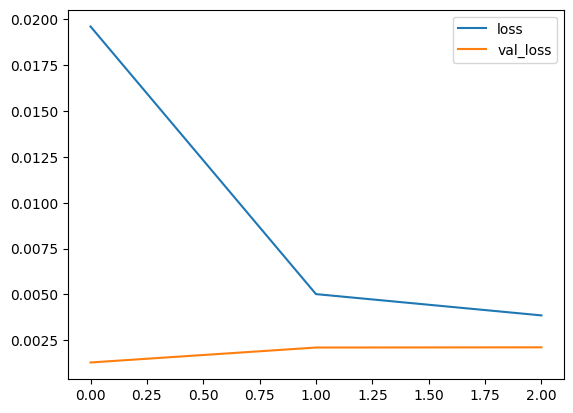

In [27]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [28]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [29]:
test_predictions

[array([0.41133612], dtype=float32),
 array([0.4511081], dtype=float32),
 array([0.4751693], dtype=float32),
 array([0.45761248], dtype=float32),
 array([0.40503365], dtype=float32),
 array([0.31883755], dtype=float32),
 array([0.2370879], dtype=float32),
 array([0.18034093], dtype=float32),
 array([0.17660683], dtype=float32),
 array([0.21505158], dtype=float32),
 array([0.2758423], dtype=float32),
 array([0.33817497], dtype=float32),
 array([0.39865693], dtype=float32),
 array([0.4463775], dtype=float32),
 array([0.47124127], dtype=float32),
 array([0.46243078], dtype=float32),
 array([0.4175191], dtype=float32),
 array([0.3457542], dtype=float32)]

In [30]:
true_predictions = scaler.inverse_transform(test_predictions)

In [31]:
test.loc[:, 'Predictions'] = true_predictions

In [32]:
test

,Production,Predictions
DATE,,
2018-04-01,112.4309,115.224235
2018-05-01,110.3544,120.693434
2018-06-01,124.5841,124.002184
2018-07-01,117.2215,121.587877
2018-08-01,112.6779,114.357557
2018-09-01,103.3118,102.504395
2018-10-01,92.1321,91.262683
2018-11-01,82.4347,83.459185
2018-12-01,76.7608,82.945695


<Axes: xlabel='DATE'>

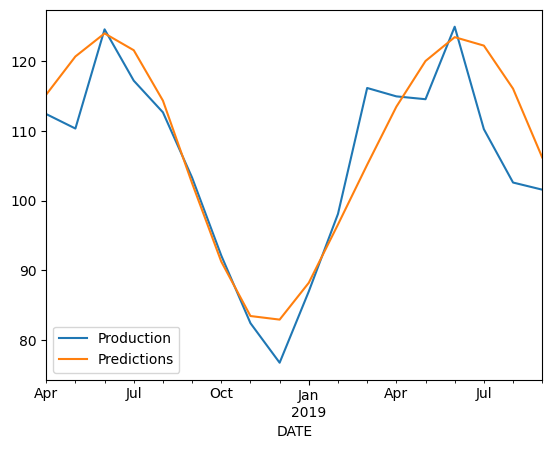

In [33]:
test.plot()

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
np.sqrt(mean_squared_error(test['Production'], test['Predictions']))

np.float64(6.162262835792513)

In [36]:
model.save('../models/frozen_dessert_rnn_model.keras')

In [37]:
import joblib

In [38]:
joblib.dump(scaler, '../models/frozen_dessert_rnn_scaler.pkl')

['../models/frozen_dessert_rnn_scaler.pkl']

In [39]:
from tensorflow.keras.models import load_model

In [40]:
frozen_desser_model = load_model('../models/frozen_dessert_rnn_model.keras')
frozen_desser_scaler = joblib.load('../models/frozen_dessert_rnn_scaler.pkl')

In [41]:
import json

In [42]:
def return_frozen_dessert_prediction_json(model, scaler, sample_json):
    recent_values = sample_json.get("recent_production", [])

    if len(recent_values) != 12:
        return json.dumps({
            "error": "Input must contain exactly 12 time-ordered production values."
        })


    input_array = np.array(recent_values).reshape(-1, 1)
    scaled_input = scaler.transform(input_array)
    model_input = scaled_input.reshape(1, 12, 1)

    prediction_scaled = model.predict(model_input)
    prediction = scaler.inverse_transform(prediction_scaled)

    result = {
        "next_month_prediction": float(prediction[0][0])
    }

    return json.dumps(result)

In [43]:
sample_json = {
    "recent_production": [
        110.5, 115.2, 112.3, 118.0, 120.5, 125.3,
        123.1, 128.6, 130.7, 129.4, 131.0, 132.5
    ]
}

In [44]:
prediction_json = return_frozen_dessert_prediction_json(model, scaler, sample_json)
print("JSON Prediction Result:")
print(prediction_json)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
JSON Prediction Result:
{"next_month_prediction": 121.61700439453125}
